# Training police to catch thief

In [ ]:
import sys
sys.path.append('pyFiles')
from MultiAgentEnv1 import CustomEnvironment 
import networkx as nx
import pprint
import numpy as np

In [ ]:
env = CustomEnvironment()
print(env.state)

## Initializing Value Function for every possible states


In [ ]:
print (env.g_no_node)

value_func = [0] * env.g_no_node * (env.g_no_node)

print('13 x 13 = ',13*13)

print('length of array is ',len(value_func))

## Action Value Function
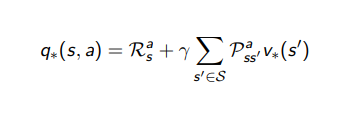

In [ ]:
env.temp_render(100000)

In [ ]:
print(env.reset())
action = {'player_0':0,'player_1':0}

print(env.node_inv_dict[env.state['player_0']])
observations, rewards, terminations, truncations, infos = env.step(action)
print(observations)
print(env.node_inv_dict[observations['player_0']])

In [ ]:
def q_val(env,state,action,value_func,agent):
    env.state = state
    observations, rewards, terminations, truncations, infos = env.step(action)
    state_val = value_func[13*env.node_inv_dict[observations['player_0']]+env.node_inv_dict[observations['player_1']]]
    env.reset()
    return rewards[agent] + 0.9*state_val


In [ ]:
# testing

action = {'player_0':0,'player_1':0}
state = env.reset()
print(state)
agent = 'player_1'
q_val(env,state,action,value_func,agent)

## State Value Function
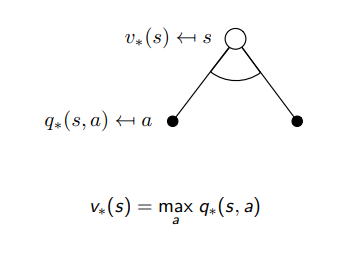

In [ ]:
def s_val(env,state,value_func,agent):
    q_values = []
    n0 = np.random.randint(0,env.possible_move_range('player_0')+1)
    action = {'player_0':n1,'player_1':0}
    for neighbor in env.g_env.neighbors(state[agent]):
        q_values.append(q_val(env,state,action,value_func,agent))
        action[agent] += 1
    q_values.append(q_val(env,state,action,value_func,agent))  # for not moving state
    return max(q_values)

In [ ]:
print (env.state)
print(s_val(env,env.state,value_func,'player_1'))

## Single Sweep ( Value Iteration )
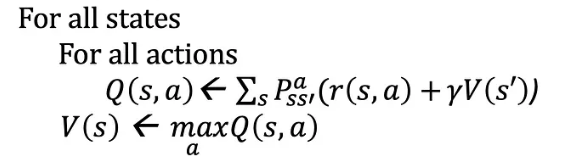

In [ ]:
# testing
print(28 % 13)
print(28 // 13)
print(13*2 +2)

In [ ]:
# here we iterate values for all states/nodes
# taking the nodes in integer format
def single_sweep(env,value_func,agent):
    # initializing a temporary value function so that the value function does not use the new values of value function
    # before the complete new value function is formed
    temp_value_func = [0] * env.g_no_node ** 2    
    for i in range(env.g_no_node**2): 
        # Converting the indexed state of node to proper usable state
        # State is a dictionary relating the player to the node position
        # so what we do is make the state according to the value of i
        # here we have 13x13 matrix(imaginary, one dimensional in reality) 
        # where the rows represent the position of the thief and the column 
        # represent the state of the police
        thief_position = i // 13
        police_position = i % 13
        state = {'player_0':env.node_dict[thief_position],'player_1':env.node_dict[police_position]}
        # Updating the temp_value_function for the ith index
        temp_value_func[i] = s_val(env,state,value_func,agent)
#     temp_value_func[2] = 0
    return temp_value_func

In [ ]:
# testing single sweep
value_func = [0] * env.g_no_node ** 2
action = {'player_0':0,'player_1':0}
state = env.reset()
agent = 'player_1'
print(single_sweep(env,value_func,agent))
print()
value_func = single_sweep(env,value_func,agent)
print(single_sweep(env,value_func,agent))

## Value iteration until convergence

In [ ]:
state = env.reset()
value_func = [0] * env.g_no_node ** 2
delta = 0.001 
diff = 1000
agent = 'player_1'
while (diff > delta):
    temp_value_func = value_func
    value_func = single_sweep(env,value_func,agent)
    temp_diff = 0;
    for index in range(len(value_func)):
        temp_diff += abs(temp_value_func[index]-value_func[index])
    diff = temp_diff
print(value_func)
    

## Using the values obtained to set the policy 

In [ ]:
# testing
env.node_dict[1]
for neigh in env.g_env.neighbors(env.state['player_1']):
    print(neigh)

In [ ]:
temp_policy = [0]*(env.g_no_node**2)
agent = 'player_1'
for i in range(env.g_no_node**2):
    agent = 'player_1'
    n1 = np.random.randint(0,env.possible_move_range('player_0')+1)
    action = {'player_0':n1,'player_1':0}
    q_values = []
    thief_position = i // 13
    police_position = i % 13
    state = {'player_0':env.node_dict[thief_position],'player_1':env.node_dict[police_position]}
    action[agent] = -1 
    for neighbor in env.g_env.neighbors(env.state[agent]):
        action[agent] += 1
        q_values.append(q_val(env,state,action,value_func,agent))
    max_val = max(q_values)
    req_index = q_values.index(max_val)        
    temp_policy[i] = int(req_index) 

print(temp_policy)
temp_policy = list(temp_policy)

In [ ]:
# print('the neighbours are ')
# policy_neighbours = [list(env.g_env.neighbors(env.node_dict[i]))[int(temp_policy[i])] for i in range(len(temp_policy))]
# pprint.pprint (policy_neighbours)
# corresponding numerical vaues are
# policy_neighbours_num = [env.node_inv_dict[i] for i in policy_neighbours]
# print(policy_neighbours_num)


## Implement the Policy

In [ ]:
# testing
print(type(temp_policy[0]))

In [ ]:
episodes = 1    
for episode in range(1,episodes+1):
    state = env.reset()
    terminations = False
    score = {a:0 for a in env.possible_agents}
    print(state)
    while not terminations:
        n0 = np.random.randint(0,env.possible_move_range('player_0')+1)
        print(n0)
        env.temp_render(episode)
        n1 = temp_policy[13*env.node_inv_dict[env.state['player_0']]+env.node_inv_dict[env.state['player_1']]]
        action = {'player_0':n0,'player_1':n1}
        observations, rewards, terminations, truncations, infos = env.step(action)
        if (terminations == True):
            print('terminating episode = {}'.format(env.step_now))
        for agent in env.possible_agents:
            score[agent] += rewards[agent]
    print('Episode: {} Score: {} \n'.format(episode,score))